**Spinodal decomposition**

Benchmark problem 1: https://pages.nist.gov/pfhub/benchmarks/benchmark1.ipynb/

**Contributor**: Qian (Jennifer) Zhang, INL, qian.jennifer.zhang@gmail.com

**Free energy functional**:

$$F=\int_V (f_{chem}+\frac{\kappa}{2}|\nabla c|^2) dx$$

where $f_{chem}$ is the chemical free energy density and $\kappa$ is the gradient energy coefficient. For this problem, we choose $f_{chem}$ to have a simple polynomial form,

$$f_{chem}(c) = \rho_s(c-c_\alpha)^2(c-c_\beta)^2$$

**The Cahn-Hilliard Equation** is

$$\frac{\partial c}{\partial t}=\nabla\cdot[M\nabla(\frac{\partial f_{chem}}{\partial c}-\kappa \Delta c)]$$

$+$ Period boundary condition

**Numerical Angorithm**: Fully explicit first order Eulerian in time and second order finite difference in space.

**Efficiency of this code**:

Parameters taken in the test:

$\rho_s = 5$, $\kappa=2$, $M=5$, $c_\alpha=0.3$, $c_\beta=0.7$,

$dt = 1e-5$, $dxx=1/dx^2=1$, 

nsteps = 3000

$64\times 64 \times 64$ ~ 130s/3000steps

$128\times 128 \times 128$ ~ 1063s/3000steps

Time complexity of the code is O($nx\times ny\times nz$). You can estimate the running time according to your grid size.

The user can test by themselves with %%timeit or %%time on the cell they would like to test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

class solver_CH():
    def __init__(self,rho,kappa,M,ca,cb):
        self.rho = rho
        self.kappa = kappa
        self.M = M
        self.ca = ca
        self.cb = cb
        
    def dfchemdc(self,w):
        return 2.0*self.rho*(w-self.ca)*(w-self.cb)*(2.0*w-self.ca-self.cb)
    
    def delta_c(self,w,dxx):
        nx = w.shape[0]
        ny = w.shape[1]
        nz = w.shape[2]
        
        #initialize intermediate values
        w_x_pre = np.zeros((nx,ny,nz))
        w_x_la = np.zeros((nx,ny,nz))
        w_y_pre = np.zeros((nx,ny,nz))
        w_y_la = np.zeros((nx,ny,nz))
        w_z_pre = np.zeros((nx,ny,nz))
        w_z_la = np.zeros((nx,ny,nz))
        
        # periodic boundary condition in x direction
        w_x_pre[0:nx-1,:,:] = w[1:nx,:,:] 
        w_x_pre[nx-1,:,:] = w[0,:,:]
        
        w_x_la[1:nx,:,:] = w[0:nx-1,:,:] 
        w_x_la[0,:,:] = w[nx-1,:,:]
        
        # periodic boundary condition in z direction
        w_z_pre[:,:,0:nz-1] = w[:,:,1:nz] 
        w_z_pre[:,:,nz-1] = w[:,:,0]
        
        w_z_la[:,:,1:nz] = w[:,:,0:nz-1] 
        w_z_la[:,:,0] = w[:,:,nz-1]
        
        # periodic boundary condition in y direction
        w_y_pre[:,0:ny-1,:] = w[:,1:ny,:] 
        w_y_pre[:,ny-1,:] = w[:,0,:]
        
        w_y_la[:,1:ny,:] = w[:,0:ny-1,:] 
        w_y_la[:,0,:] = w[:,ny-1,:]
        
        #dxx=1/dx**2
        return (w_x_la-2*w+w_x_pre)*dxx+(w_y_la-2*w+w_y_pre)*dxx+(w_z_la-2*w+w_z_pre)*dxx
        
    
    def Solve_CH(self,dt,dxx,c):
        nx = c.shape[0]
        ny = c.shape[1]
        nz = c.shape[2]
        
        mu = np.zeros((nx,ny,nz))
        c_new = np.zeros((nx,ny,nz))
        
        mu = self.dfchemdc(c)-self.kappa*self.delta_c(c,dxx)     
        c_new = c + dt*self.M*self.delta_c(mu,dxx)
        return c_new

In [2]:
def initial_cond(nx,ny, nz):
    c_init = 0.5 + np.random.randn(nx, ny, nz)*0.05
    return c_init

In [3]:
def visualize_3d(c_init,n):
    x, y, z = np.meshgrid(np.arange(c_init.shape[0]),
                      np.arange(c_init.shape[1]),
                      np.arange(c_init.shape[2]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Flatten the arrays to 1D
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    data = c_init.flatten()

    # Scatter plot
    ax.scatter(x, y, z, c=data, cmap='bwr')

    # Add labels
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    
    # Add title
    ax.set_title('concentration at T='+str(n))

    # Show the plot
    plt.show()

In [4]:
nx = 64
ny = 64
nz = 64
c_new = np.zeros((nx,ny,nz)) # zero clear
c_init = initial_cond(nx,ny,nz)

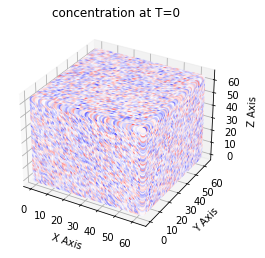

In [5]:
visualize_3d(c_init,0)

In [6]:
%%time
nsteps = 100
Solver = solver_CH(5,2,5,0.3,0.7)
for nstep in range(1,nsteps+1):
    c_new = Solver.Solve_CH(1e-5,1,c_init)
    c_init[:,:,:] = c_new[:,:,:]

Wall time: 3.77 s


nstep =  300
Maximum concentration =  0.5953500036187882
Minimum concentration =  0.4122518806781759


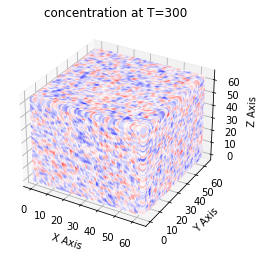

nstep =  600
Maximum concentration =  0.5760712049334499
Minimum concentration =  0.43507846141387985


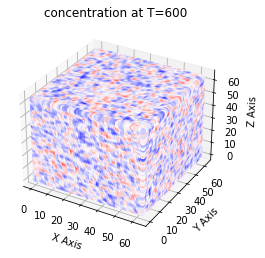

nstep =  900
Maximum concentration =  0.5672716541261412
Minimum concentration =  0.4412491459870363


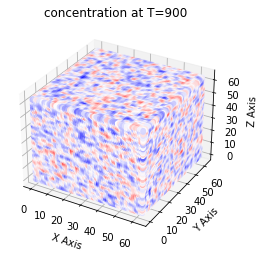

nstep =  1200
Maximum concentration =  0.560599265992634
Minimum concentration =  0.44450774286995404


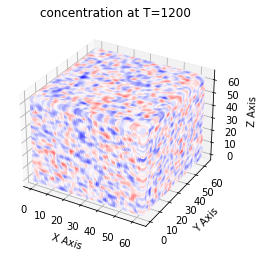

nstep =  1500
Maximum concentration =  0.5553470625058062
Minimum concentration =  0.4473961353884246


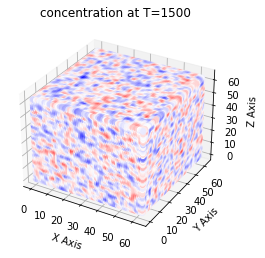

nstep =  1800
Maximum concentration =  0.5510900139138848
Minimum concentration =  0.4499197946552618


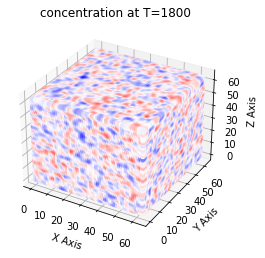

nstep =  2100
Maximum concentration =  0.5475571410335619
Minimum concentration =  0.45213036022076525


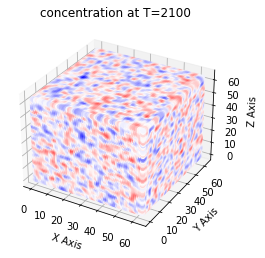

nstep =  2400
Maximum concentration =  0.5453285665834606
Minimum concentration =  0.454079596632716


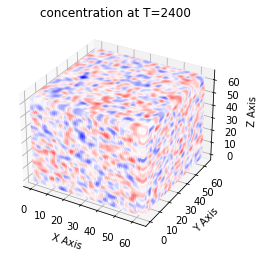

nstep =  2700
Maximum concentration =  0.5433837314132971
Minimum concentration =  0.4558105472071209


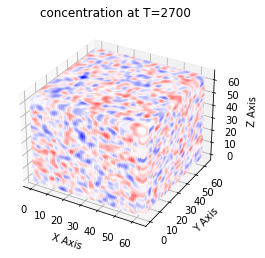

nstep =  3000
Maximum concentration =  0.5416111979985729
Minimum concentration =  0.4573577505611329


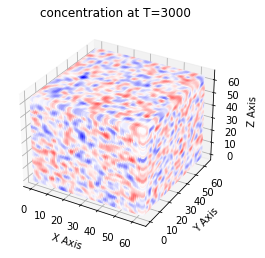

In [7]:
##Visualization

nsteps = 3000
Solver = solver_CH(5,2,5,0.3,0.7)
for nstep in range(1,nsteps+1):
    c_new = Solver.Solve_CH(1e-5,1,c_init)
    c_init[:,:,:] = c_new[:,:,:]
    if nstep % 300 == 0:
        print('nstep = ', nstep)
        print('Maximum concentration = ', np.max(c_init))
        print('Minimum concentration = ', np.min(c_init))
        visualize_3d(c_init, nstep)